# Experiment 2: Train 4 different random forrest models

In [1]:
cd ..

C:\Users\shank\Desktop\AUMC\colab\modys-video


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

from src.helpers import read_scores
from src.data_generators import EngineeredFeaturesDataGenerator
from src.data_selection import SplitScoreSelector
from src.data_generators import FeatureConfiguration
from src.ai_func import cross_validation_generator

from src.settings import LYING_VIDEOS_DATA_FOLDER
from src.settings import SITTING_VIDEOS_DATA_FOLDER

%load_ext autoreload
%autoreload 2

### Read meta data

In [3]:
scores_df = read_scores()

# Amplitude Leg

## Pipeline for training a RandomForrest

### Data selection + generation

In [4]:
selector = SplitScoreSelector(videos_folder=LYING_VIDEOS_DATA_FOLDER, left_score = 'D_LLP_R_tA_pscore', right_score = 'D_RLP_R_tA_pscore', scorer_to_use=1)
selected_data = selector.transform(scores_df)
cross_val = cross_validation_generator(selected_data)

C:\Users\shank\Desktop\AUMC\colab\modys-video\src\data_selection.py:34: UserWarning: Dropping rows [] with missing score
  warnings.warn(f'Dropping rows {only_na.index.values} with missing score')


### Feature selection

In [5]:
features_conf = FeatureConfiguration(dmtp_bodyparts = ['ankle', 'knee', 'hip'], 
                                     dtl_bodyparts = ['ankle', 'knee'], 
                                     angle_bodypart_triples=[('hip', 'knee', 'ankle')])

Computing distance to middlepoint features on:  ['ankle', 'knee', 'hip']
Computing distance to line features on:  ['ankle', 'knee']
Computing angle features on:  [('hip', 'knee', 'ankle')]


## Train network

In [6]:
def run_network(train_generator, test_generator):
    print('Running network...')
    regr = RandomForestRegressor()
    
    x, y = zip(*(train_generator[i] for i in range(len(train_generator))))
    x_train, y_train = np.vstack(x), np.vstack(y).flatten()
    
    x, y = zip(*(test_generator[i] for i in range(len(test_generator))))
    x_test, y_test = np.vstack(x), np.vstack(y).flatten()
    
    regr.fit(x_train, y_train)
    y_pred = regr.predict(x_test)
    
    print(mean_absolute_error(y_test, y_pred))
    plt.figure(figsize=(20,20))
    plt.scatter(y_test, y_pred)
    plt.show()

Fitting for 5-fold split 0
Running network...


c:\users\shank\appdata\local\programs\python\python37\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.12115384615384615


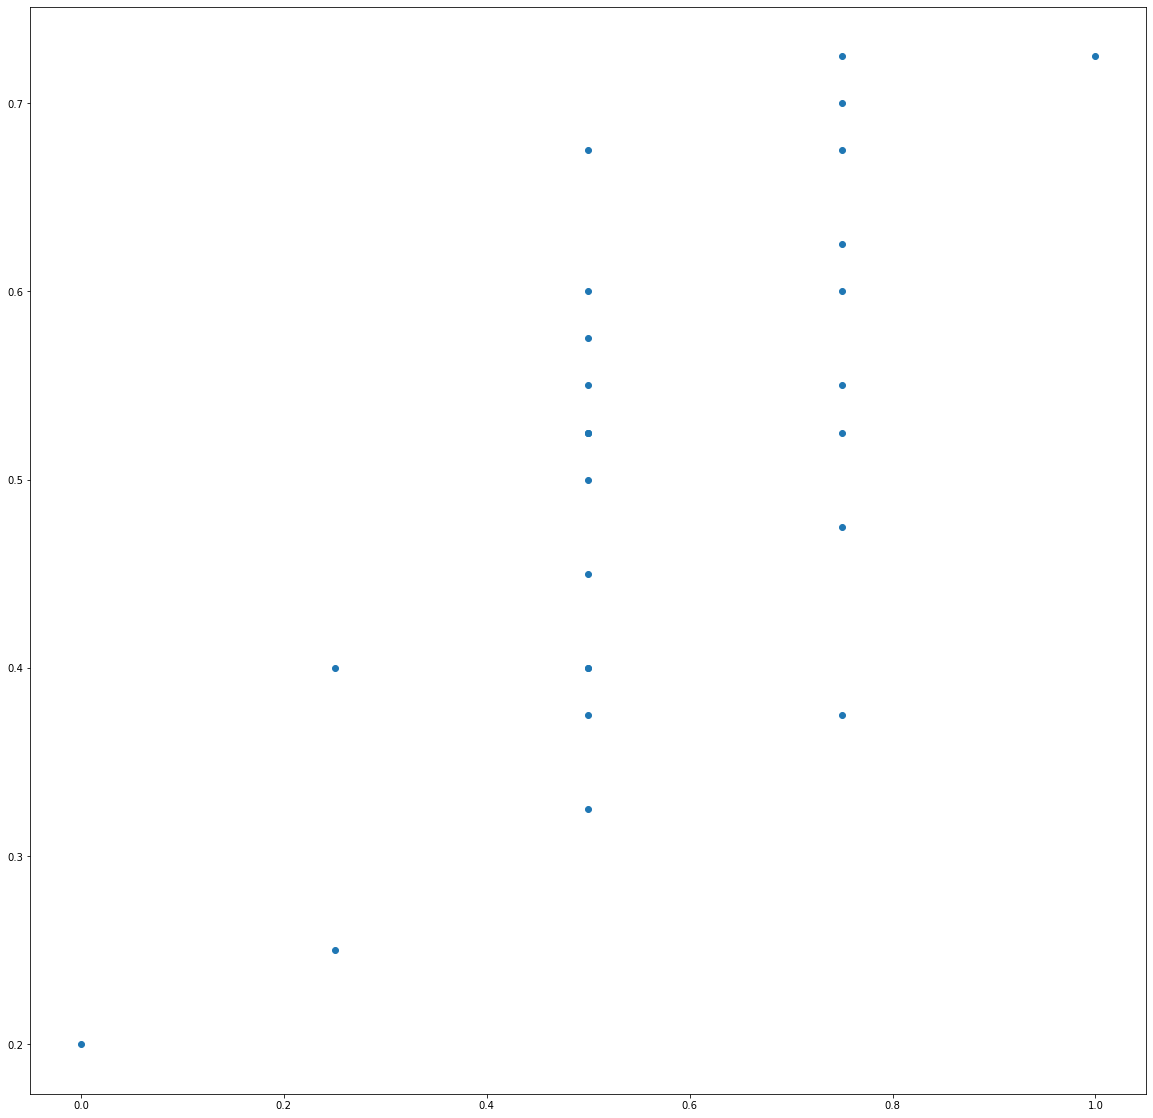

Fitting for 5-fold split 1
Running network...


c:\users\shank\appdata\local\programs\python\python37\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.13653846153846155


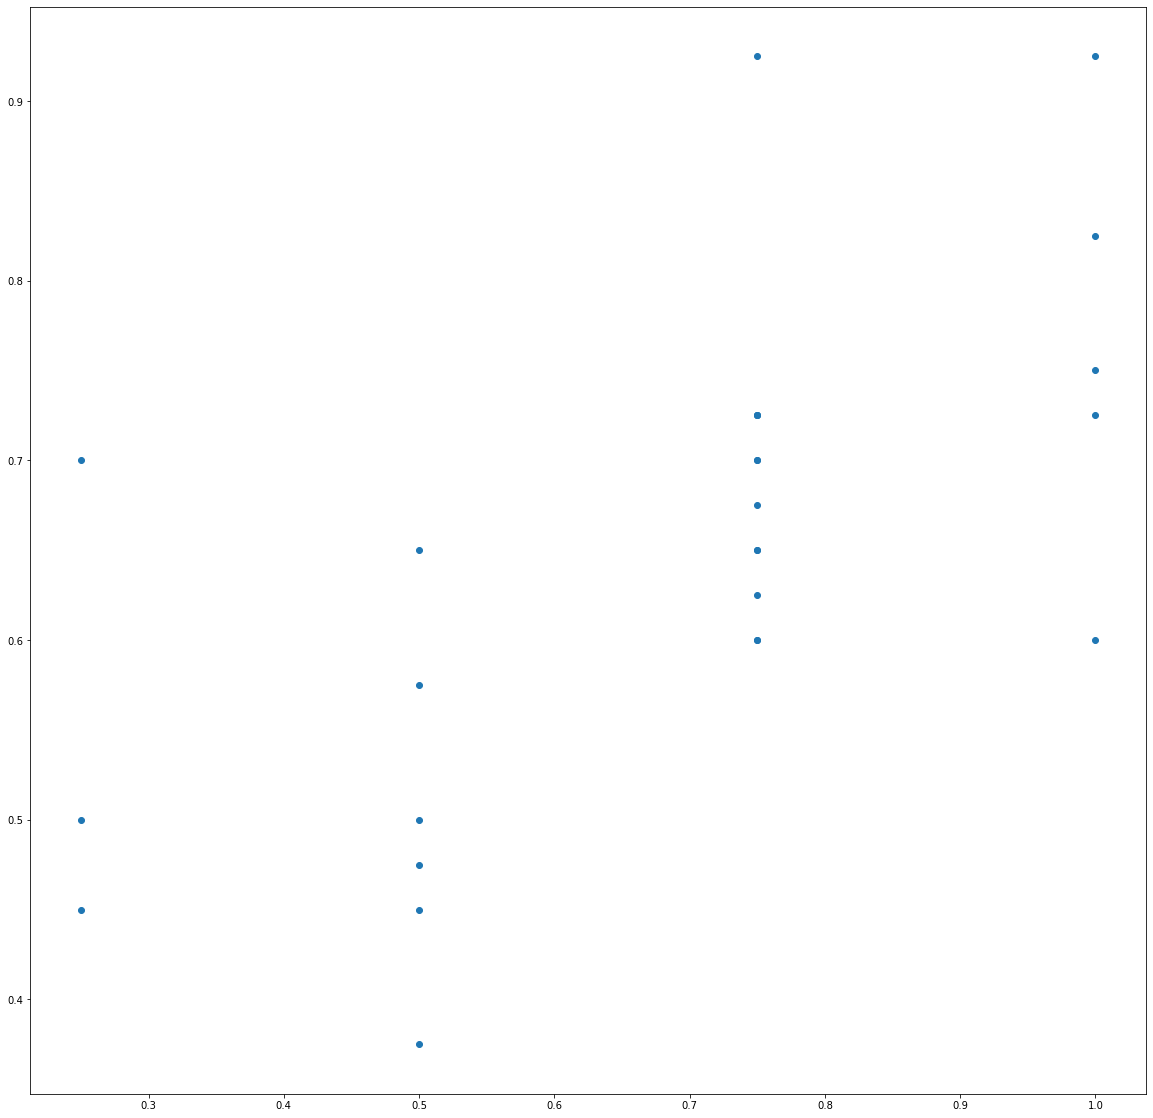

Fitting for 5-fold split 2
Running network...


c:\users\shank\appdata\local\programs\python\python37\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.1135416666666667


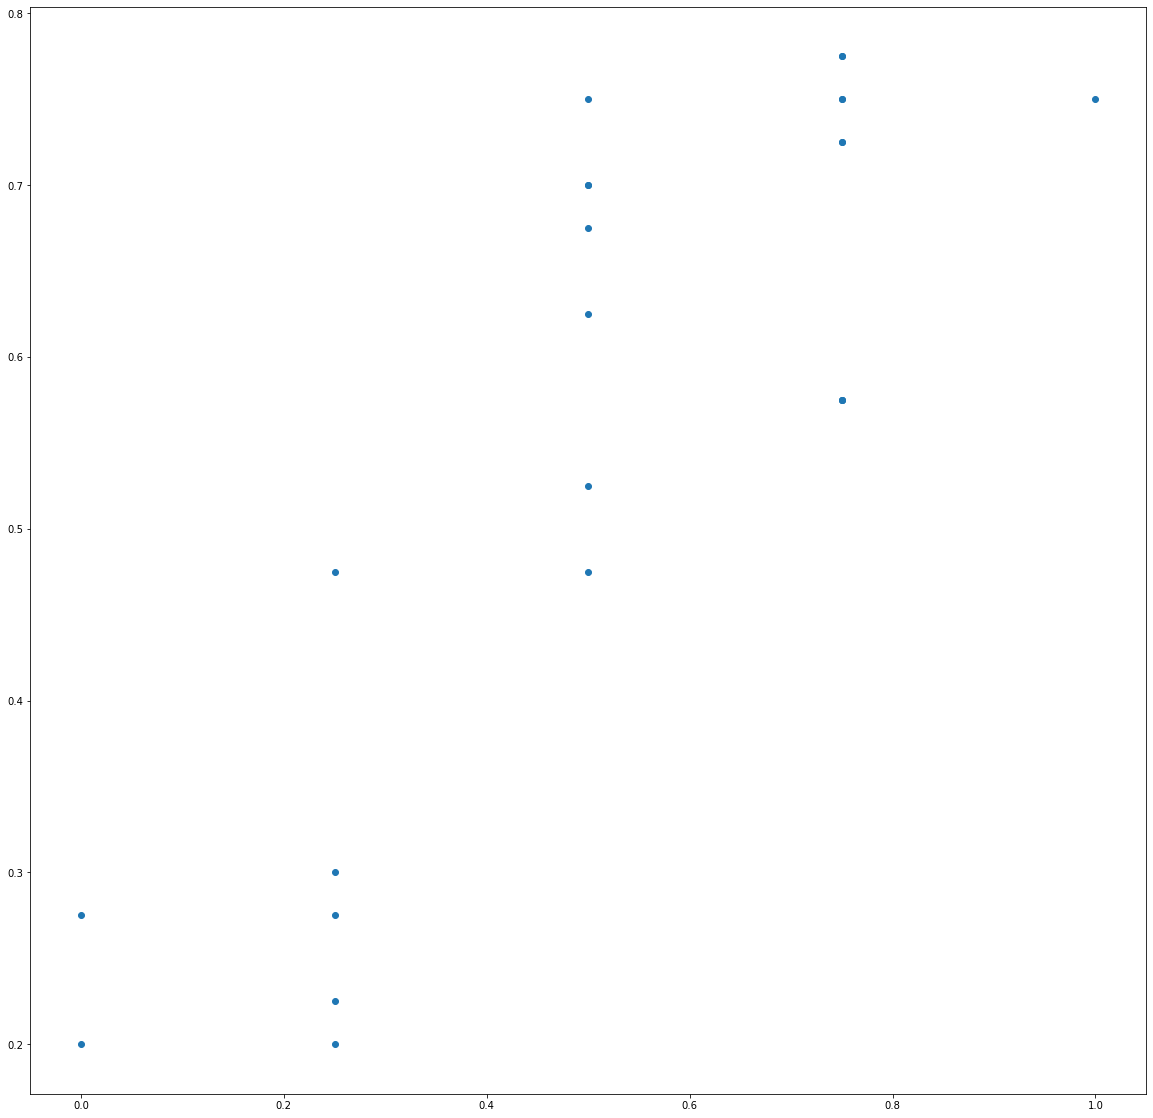

Fitting for 5-fold split 3
Running network...


c:\users\shank\appdata\local\programs\python\python37\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.16562500000000002


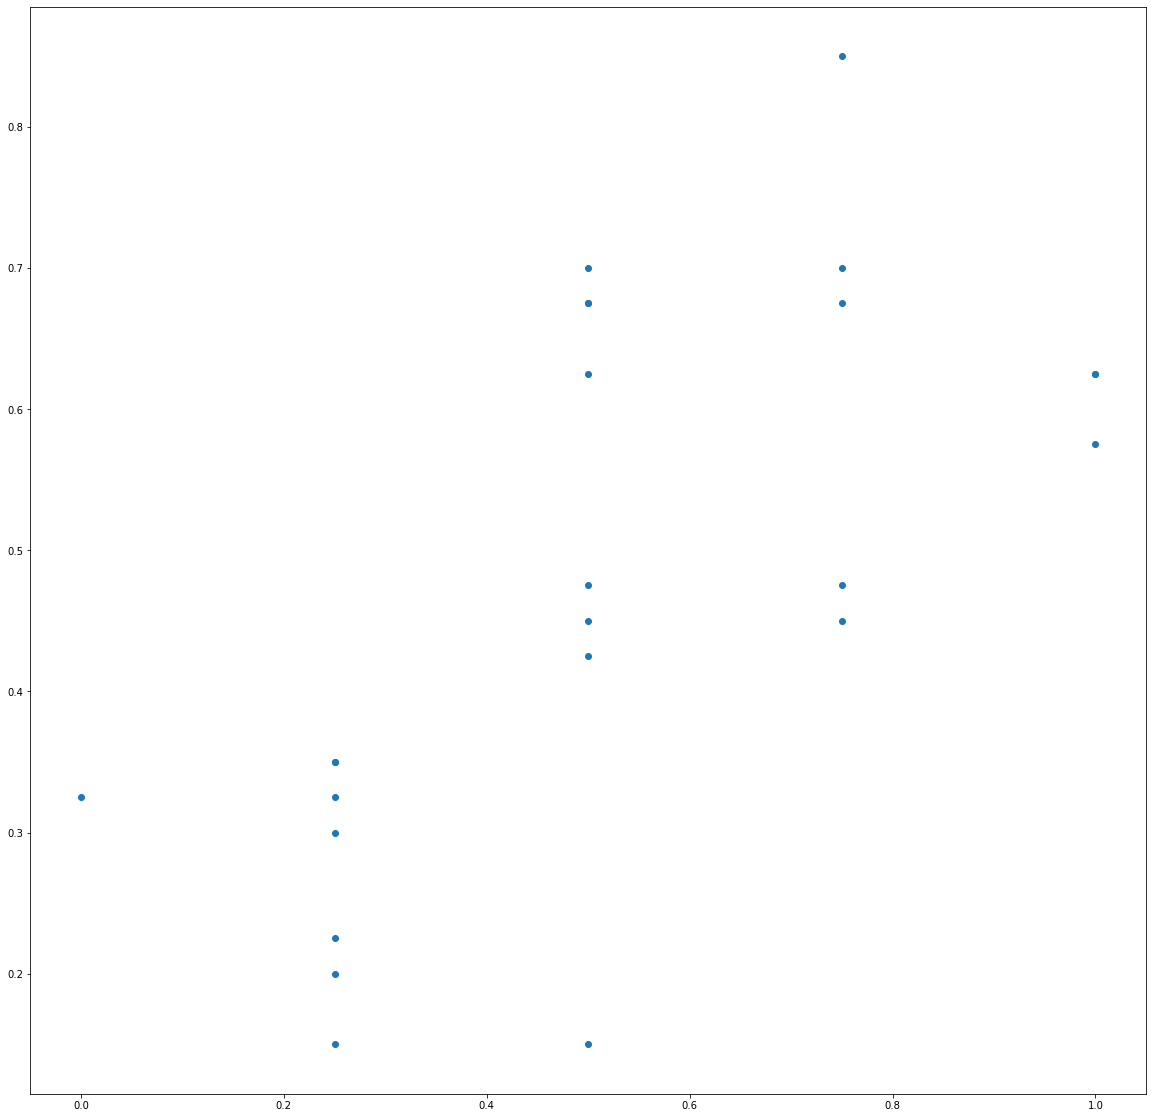

Fitting for 5-fold split 4
Running network...


c:\users\shank\appdata\local\programs\python\python37\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.159375


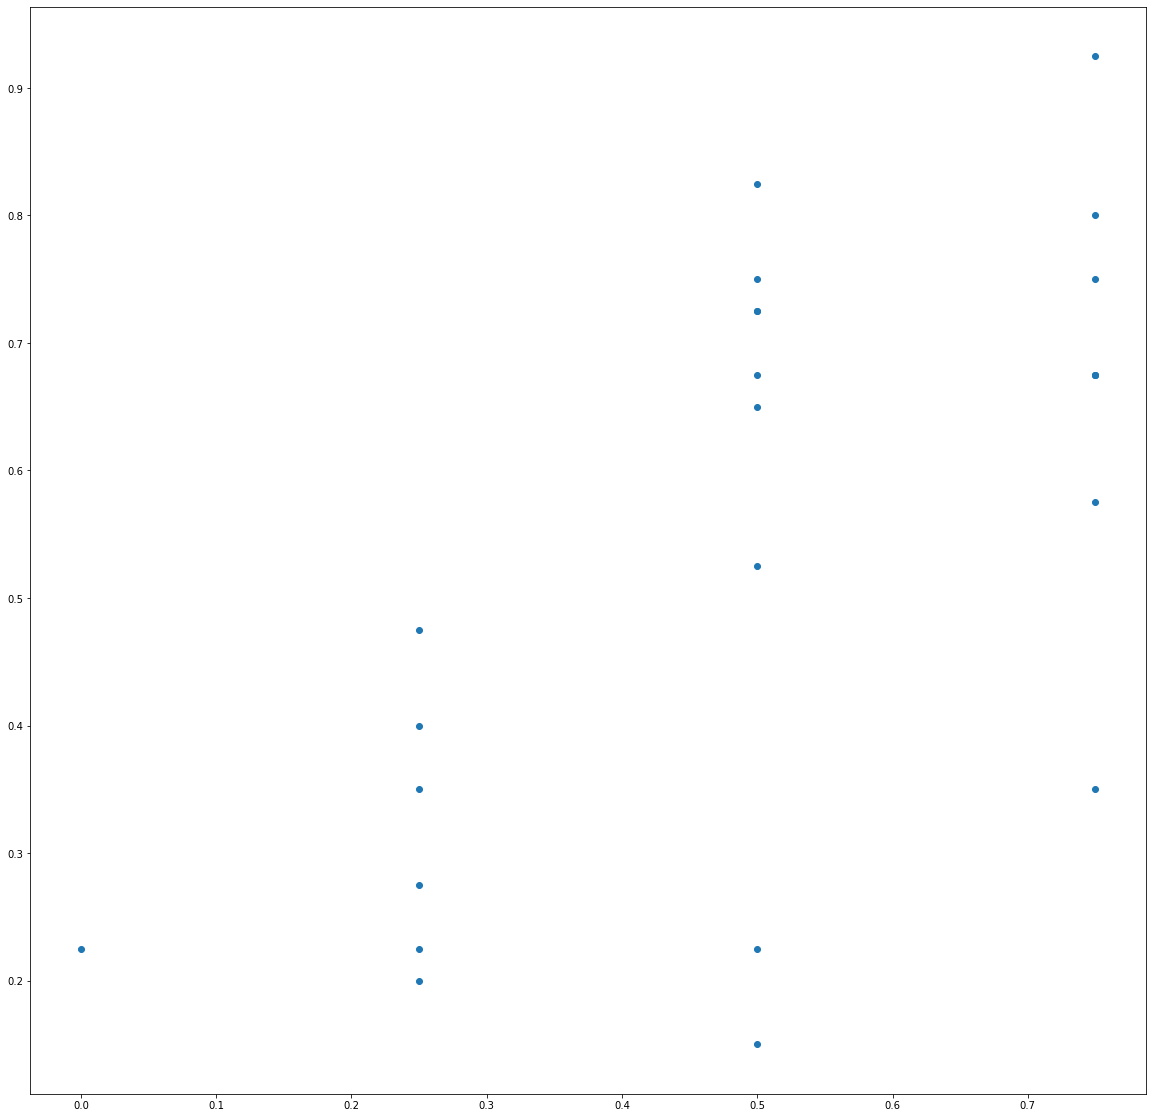

In [7]:
for i_split, (train_scores, test_scores) in enumerate(cross_val):
    print(f'Fitting for 5-fold split {i_split}')
    train_generator = EngineeredFeaturesDataGenerator(train_scores, features_conf, videos_folder=LYING_VIDEOS_DATA_FOLDER)
    test_generator = EngineeredFeaturesDataGenerator(test_scores, features_conf, videos_folder=LYING_VIDEOS_DATA_FOLDER)
    run_network(train_generator, test_generator)

# Duration Leg

## Pipeline for training a RandomForrest

### Data selection + generation

In [8]:
selector = SplitScoreSelector(videos_folder=LYING_VIDEOS_DATA_FOLDER, left_score = 'D_LLP_R_tD_pscore', right_score = 'D_RLP_R_tD_pscore', scorer_to_use=1)
selected_data = selector.transform(scores_df)
cross_val = cross_validation_generator(selected_data)

C:\Users\shank\Desktop\AUMC\colab\modys-video\src\data_selection.py:34: UserWarning: Dropping rows [] with missing score
  warnings.warn(f'Dropping rows {only_na.index.values} with missing score')


### Feature selection

In [9]:
features_conf = FeatureConfiguration(dmtp_bodyparts = ['ankle', 'knee', 'hip'], 
                                     dtl_bodyparts = ['ankle', 'knee'], 
                                     angle_bodypart_triples=[('hip', 'knee', 'ankle')])

Computing distance to middlepoint features on:  ['ankle', 'knee', 'hip']
Computing distance to line features on:  ['ankle', 'knee']
Computing angle features on:  [('hip', 'knee', 'ankle')]


## Train network

Fitting for 5-fold split 0
Running network...


c:\users\shank\appdata\local\programs\python\python37\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.13269230769230766


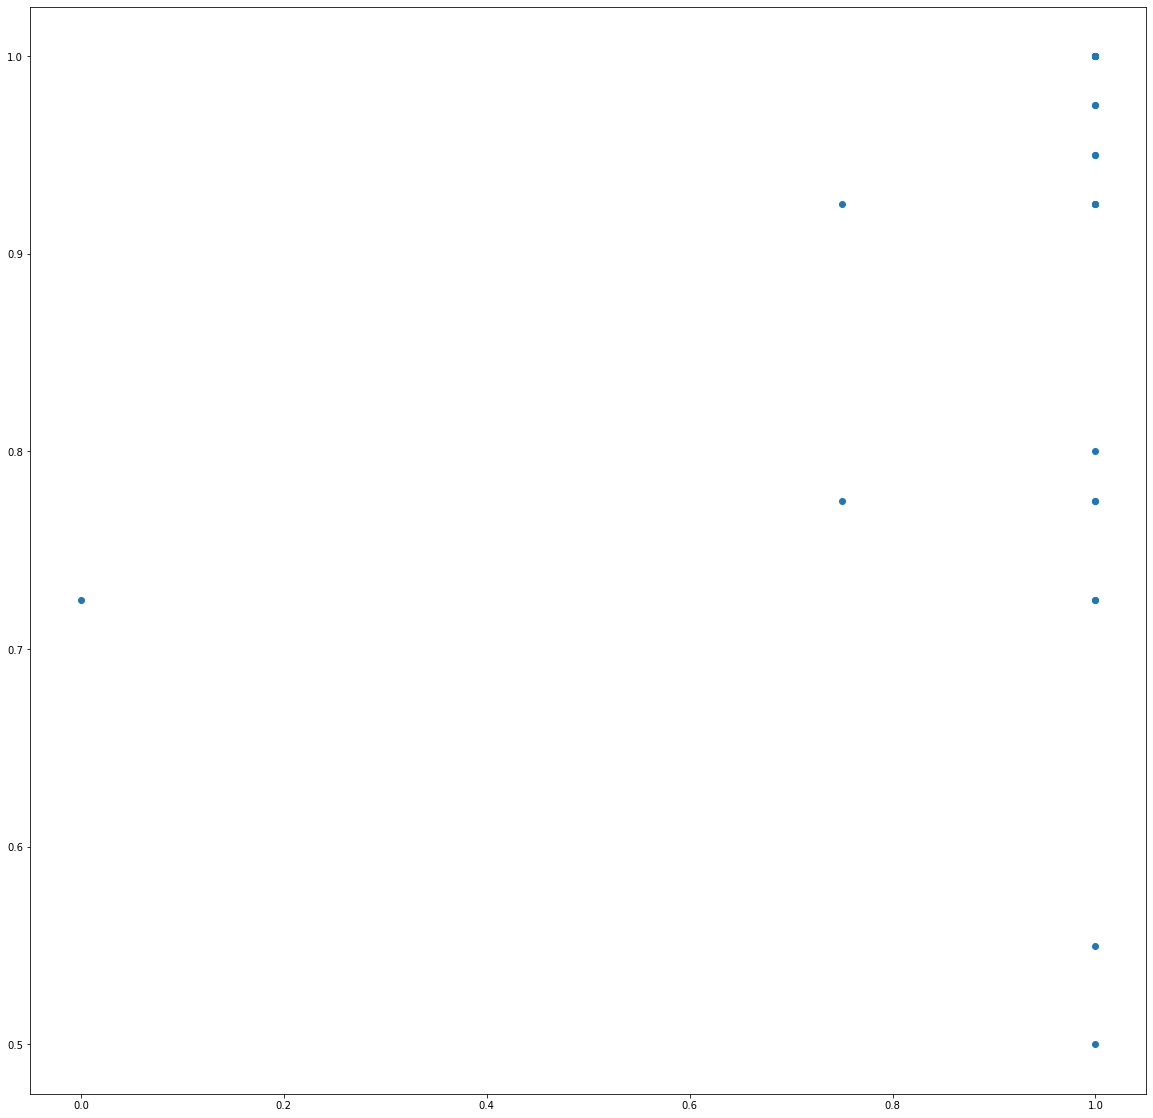

Fitting for 5-fold split 1
Running network...


c:\users\shank\appdata\local\programs\python\python37\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.07500000000000001


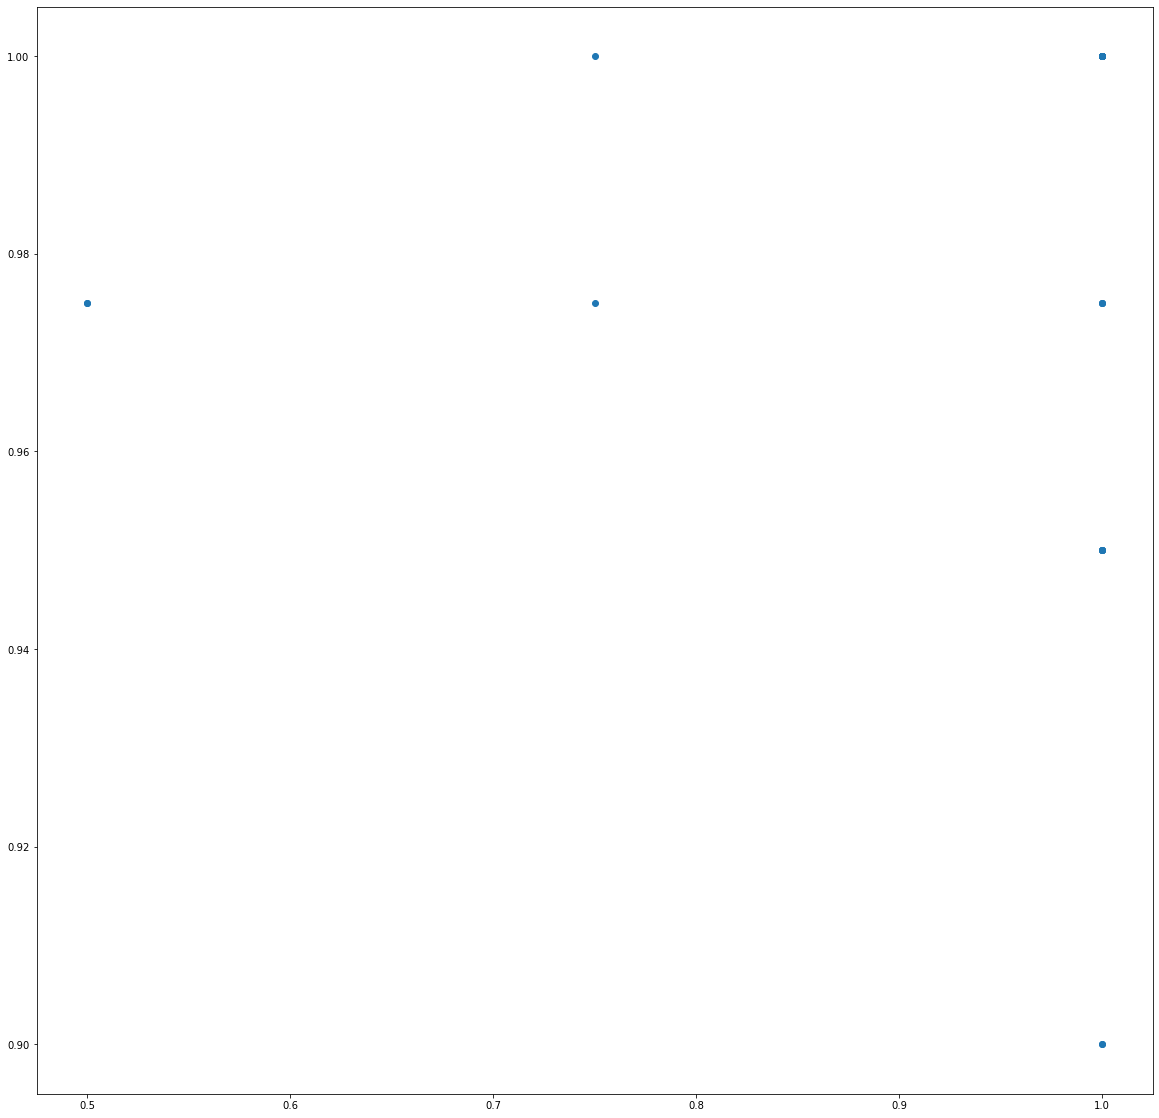

Fitting for 5-fold split 2
Running network...


c:\users\shank\appdata\local\programs\python\python37\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.18333333333333335


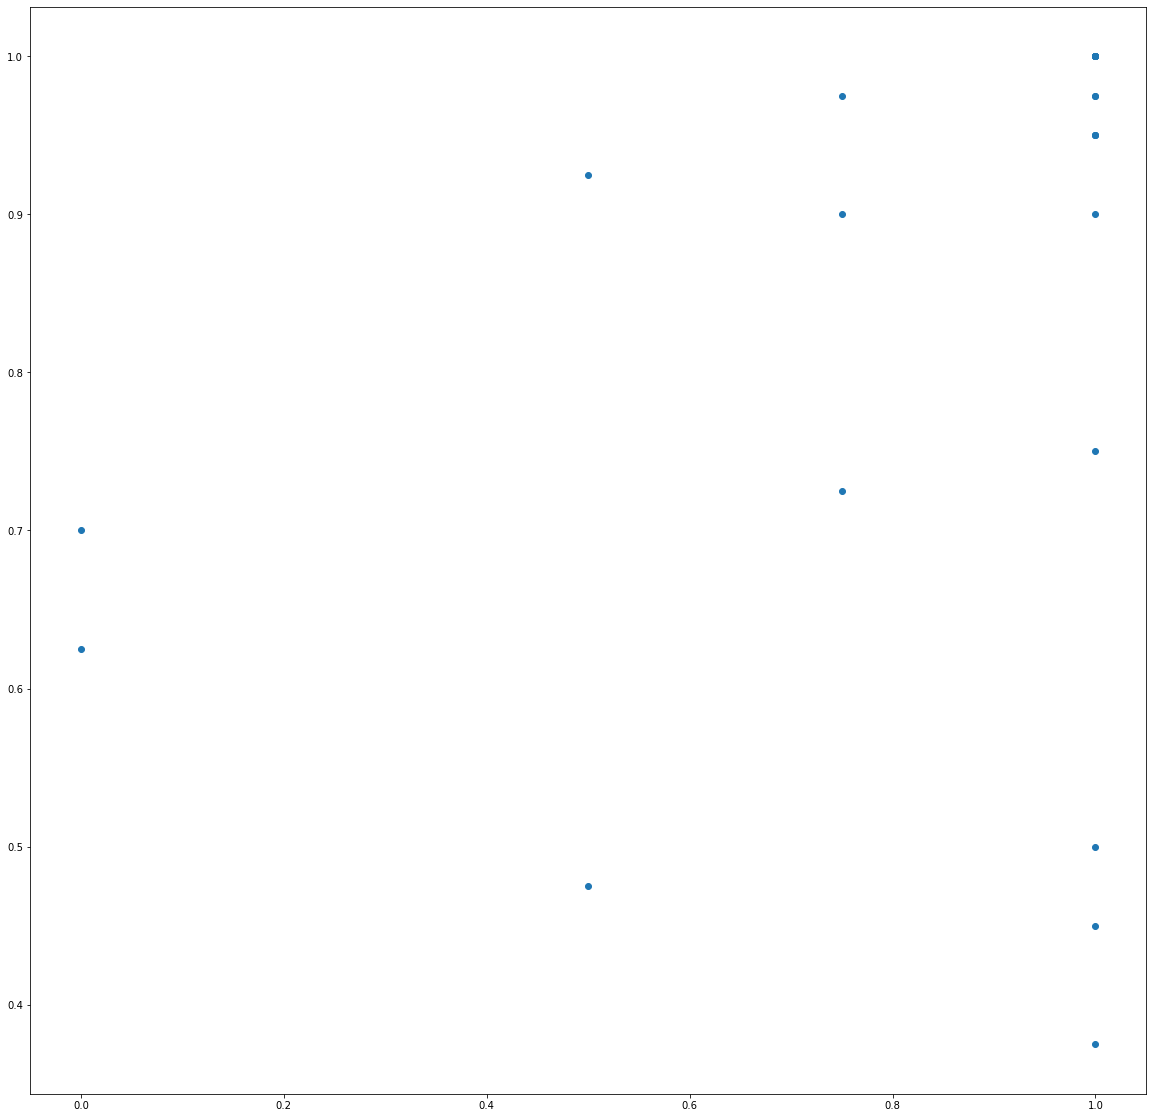

Fitting for 5-fold split 3
Running network...


c:\users\shank\appdata\local\programs\python\python37\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.20625000000000002


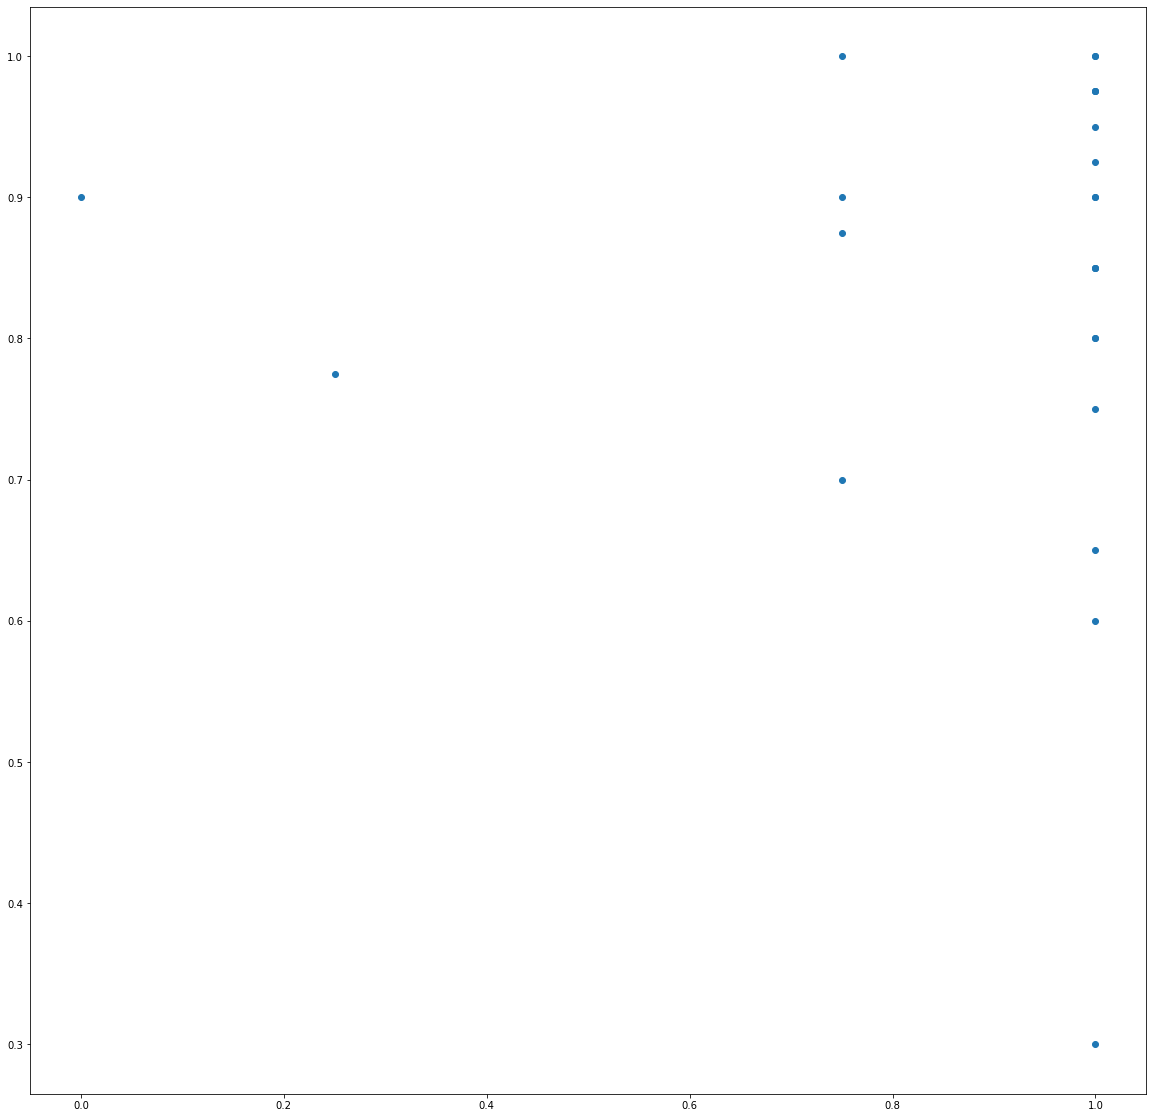

Fitting for 5-fold split 4
Running network...


c:\users\shank\appdata\local\programs\python\python37\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.11979166666666667


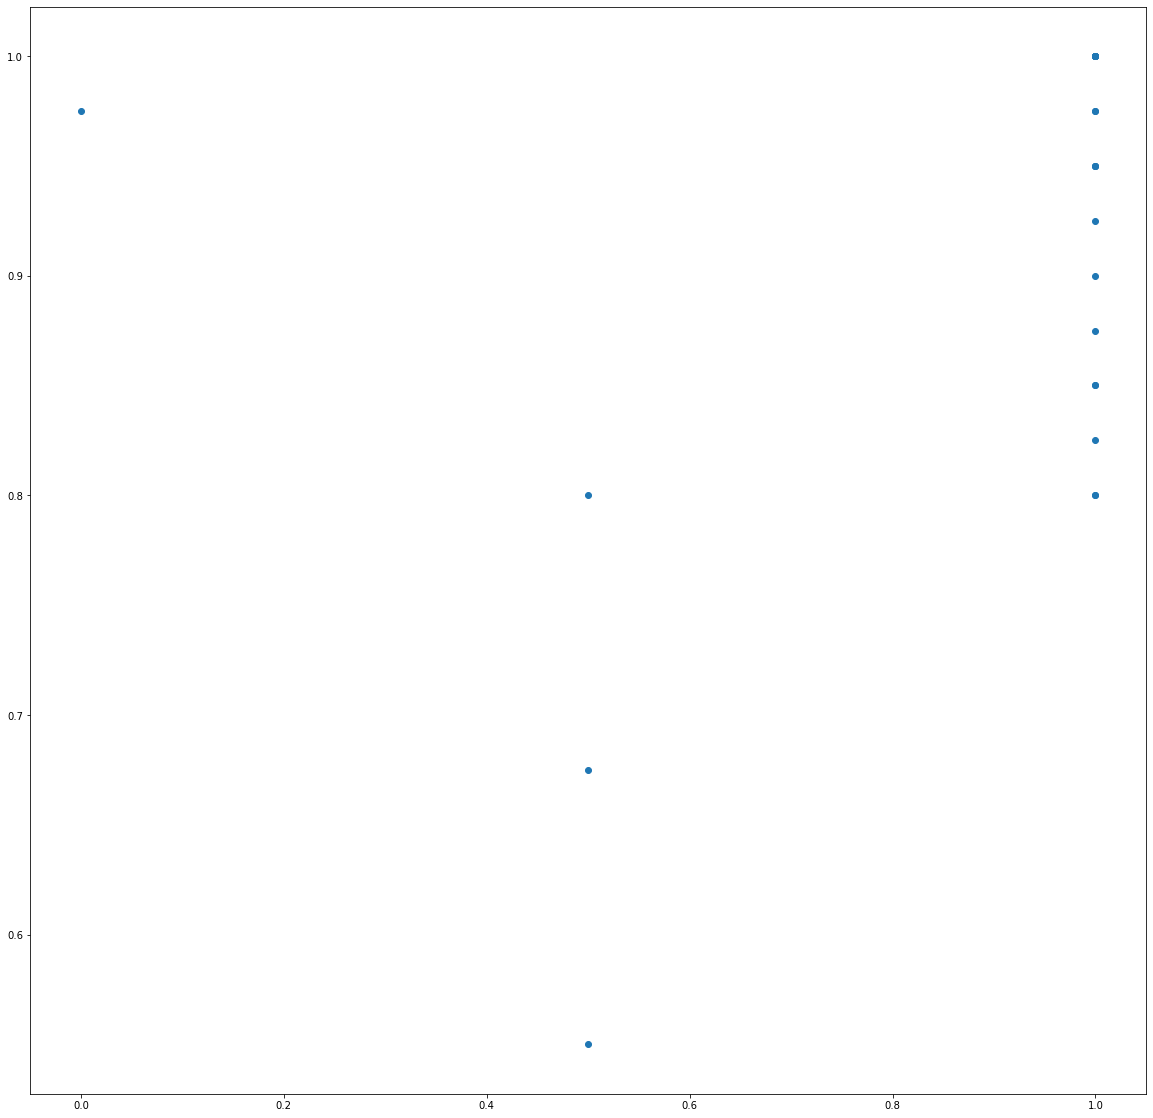

In [10]:
for i_split, (train_scores, test_scores) in enumerate(cross_val):
    print(f'Fitting for 5-fold split {i_split}')
    train_generator = EngineeredFeaturesDataGenerator(train_scores, features_conf, videos_folder=LYING_VIDEOS_DATA_FOLDER)
    test_generator = EngineeredFeaturesDataGenerator(test_scores, features_conf, videos_folder=LYING_VIDEOS_DATA_FOLDER)
    run_network(train_generator, test_generator)

# Amplitude Arm

## Pipeline for training a RandomForrest

### Data selection + generation

In [11]:
selector = SplitScoreSelector(videos_folder=SITTING_VIDEOS_DATA_FOLDER, left_score = 'D_LAP_R_tA_pscore', right_score = 'D_RAP_R_tA_pscore', scorer_to_use=1)
selected_data = selector.transform(scores_df)
cross_val = cross_validation_generator(selected_data)

C:\Users\shank\Desktop\AUMC\colab\modys-video\src\data_selection.py:34: UserWarning: Dropping rows [] with missing score
  warnings.warn(f'Dropping rows {only_na.index.values} with missing score')


### Feature selection

In [12]:
features_conf = FeatureConfiguration(dmtp_bodyparts = ['wrist', 'elbow', 'shoulder'], 
                                     dtl_bodyparts = ['wrist', 'elbow'], 
                                     angle_bodypart_triples=[('shoulder', 'elbow', 'wrist')])

Computing distance to middlepoint features on:  ['wrist', 'elbow', 'shoulder']
Computing distance to line features on:  ['wrist', 'elbow']
Computing angle features on:  [('shoulder', 'elbow', 'wrist')]


## Train network

Fitting for 5-fold split 0
Running network...


c:\users\shank\appdata\local\programs\python\python37\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.16071428571428573


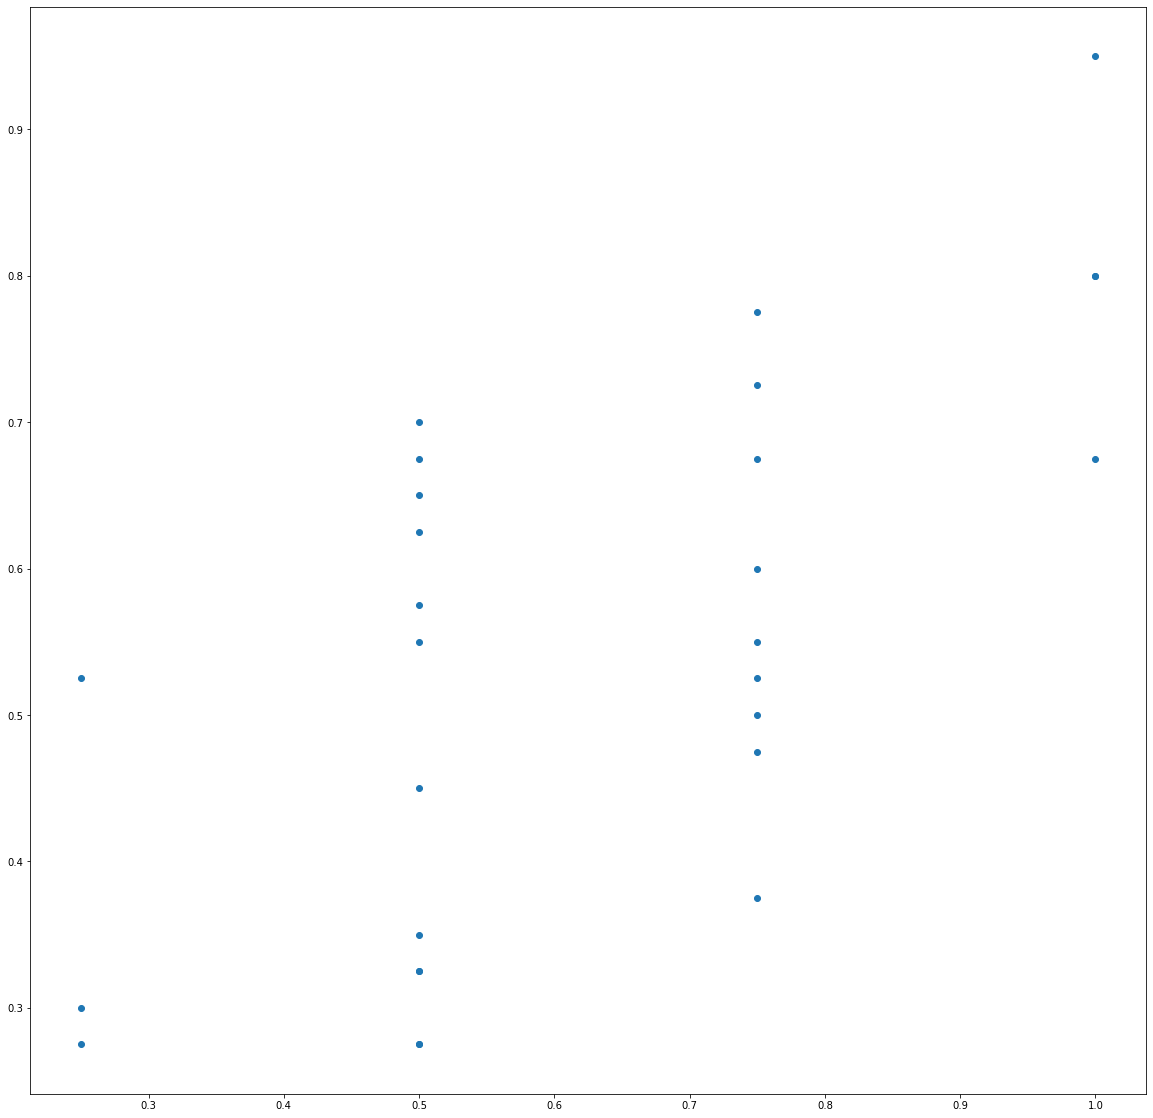

Fitting for 5-fold split 1
Running network...


c:\users\shank\appdata\local\programs\python\python37\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.25


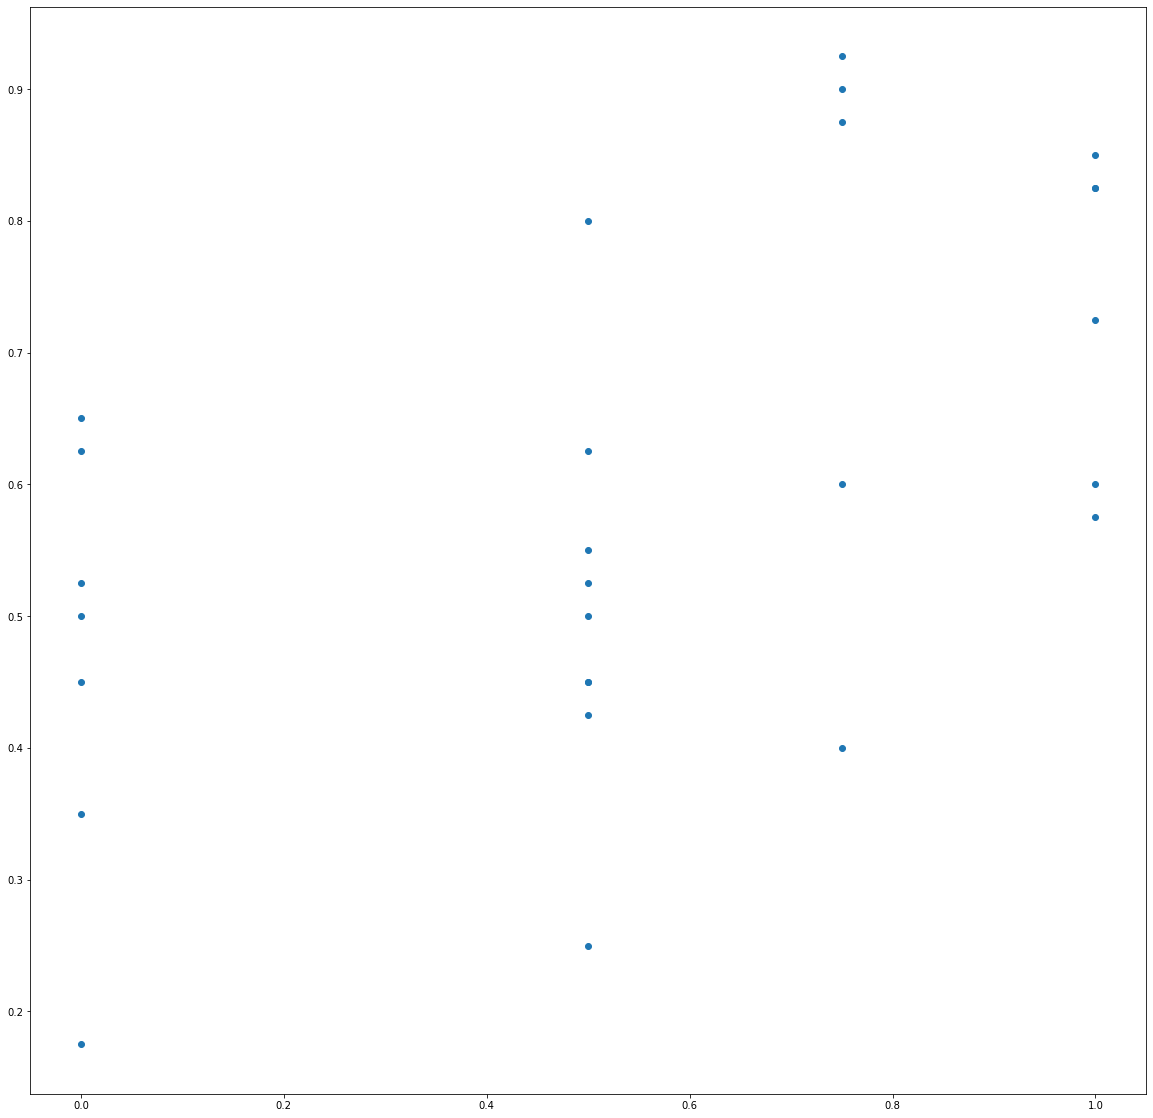

Fitting for 5-fold split 2
Running network...


c:\users\shank\appdata\local\programs\python\python37\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.15865384615384615


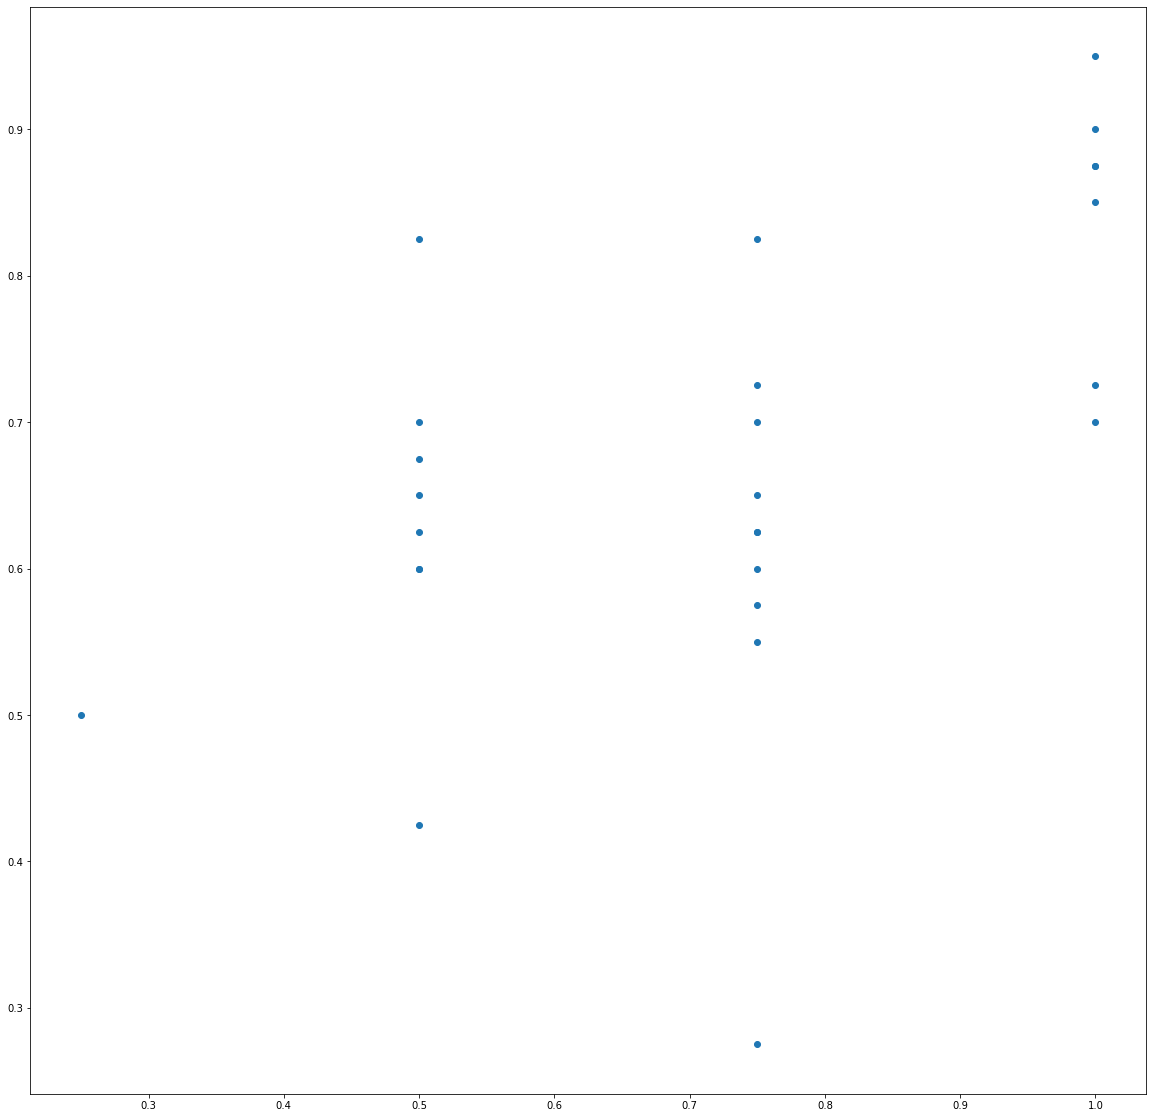

Fitting for 5-fold split 3
Running network...


c:\users\shank\appdata\local\programs\python\python37\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.21346153846153845


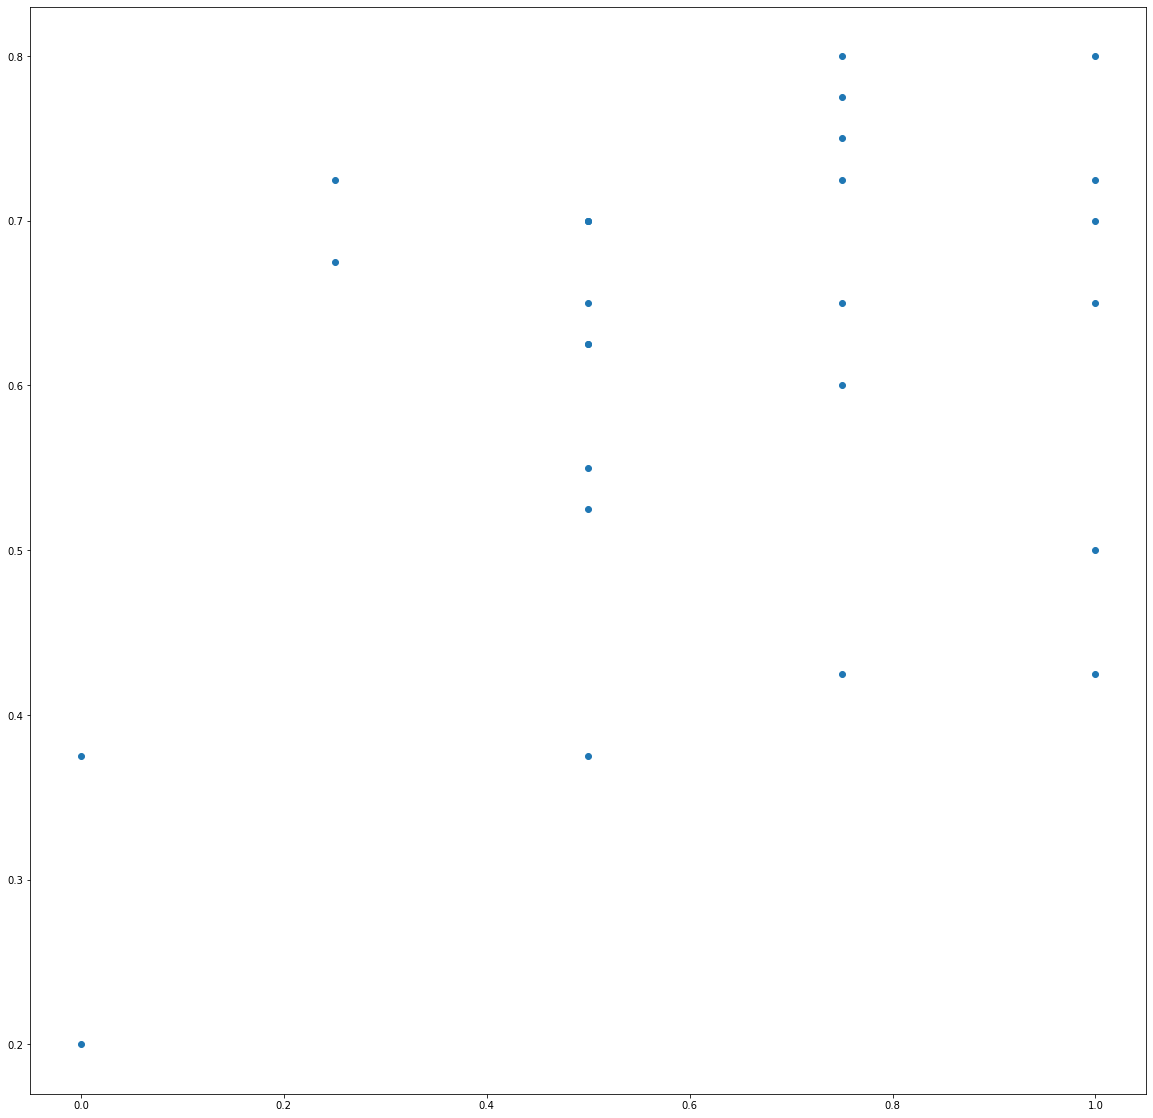

Fitting for 5-fold split 4
Running network...


c:\users\shank\appdata\local\programs\python\python37\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.18437499999999998


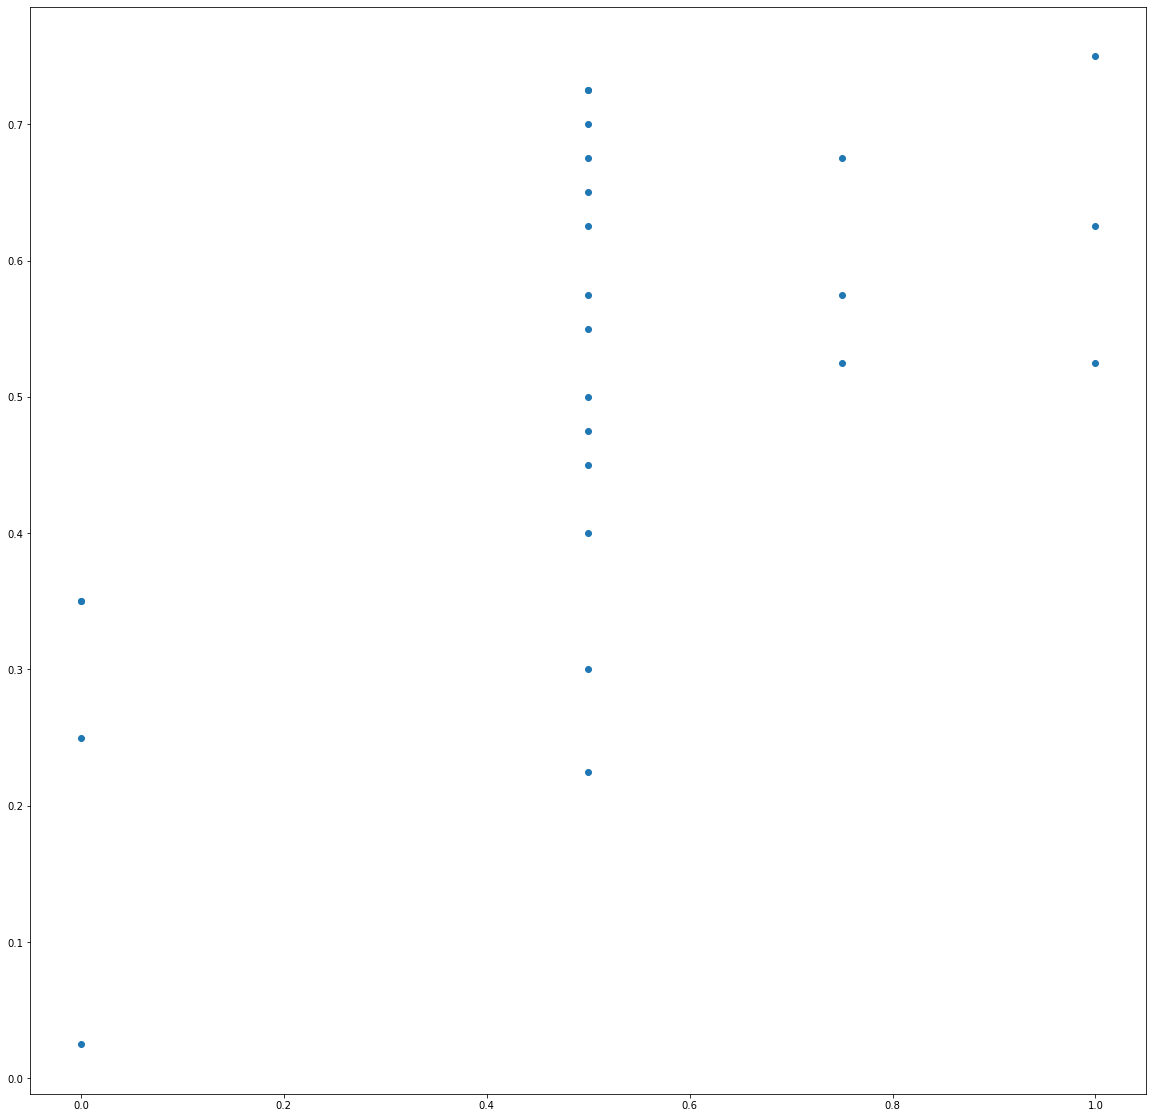

In [13]:
for i_split, (train_scores, test_scores) in enumerate(cross_val):
    print(f'Fitting for 5-fold split {i_split}')
    train_generator = EngineeredFeaturesDataGenerator(train_scores, features_conf, videos_folder=SITTING_VIDEOS_DATA_FOLDER)
    test_generator = EngineeredFeaturesDataGenerator(test_scores, features_conf, videos_folder=SITTING_VIDEOS_DATA_FOLDER)
    run_network(train_generator, test_generator)

# Duration Arm

## Pipeline for training a RandomForrest

### Data selection + generation

In [14]:
selector = SplitScoreSelector(videos_folder=SITTING_VIDEOS_DATA_FOLDER, left_score = 'D_LAP_R_tD_pscore', right_score = 'D_RAP_R_tD_pscore', scorer_to_use=1)
selected_data = selector.transform(scores_df)
cross_val = cross_validation_generator(selected_data)

C:\Users\shank\Desktop\AUMC\colab\modys-video\src\data_selection.py:34: UserWarning: Dropping rows [] with missing score
  warnings.warn(f'Dropping rows {only_na.index.values} with missing score')


### Feature selection

In [15]:
features_conf = FeatureConfiguration(dmtp_bodyparts = ['wrist', 'elbow', 'shoulder'], 
                                     dtl_bodyparts = ['wrist', 'elbow'], 
                                     angle_bodypart_triples=[('shoulder', 'elbow', 'wrist')])

Computing distance to middlepoint features on:  ['wrist', 'elbow', 'shoulder']
Computing distance to line features on:  ['wrist', 'elbow']
Computing angle features on:  [('shoulder', 'elbow', 'wrist')]


## Train network

Fitting for 5-fold split 0
Running network...


c:\users\shank\appdata\local\programs\python\python37\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.1875


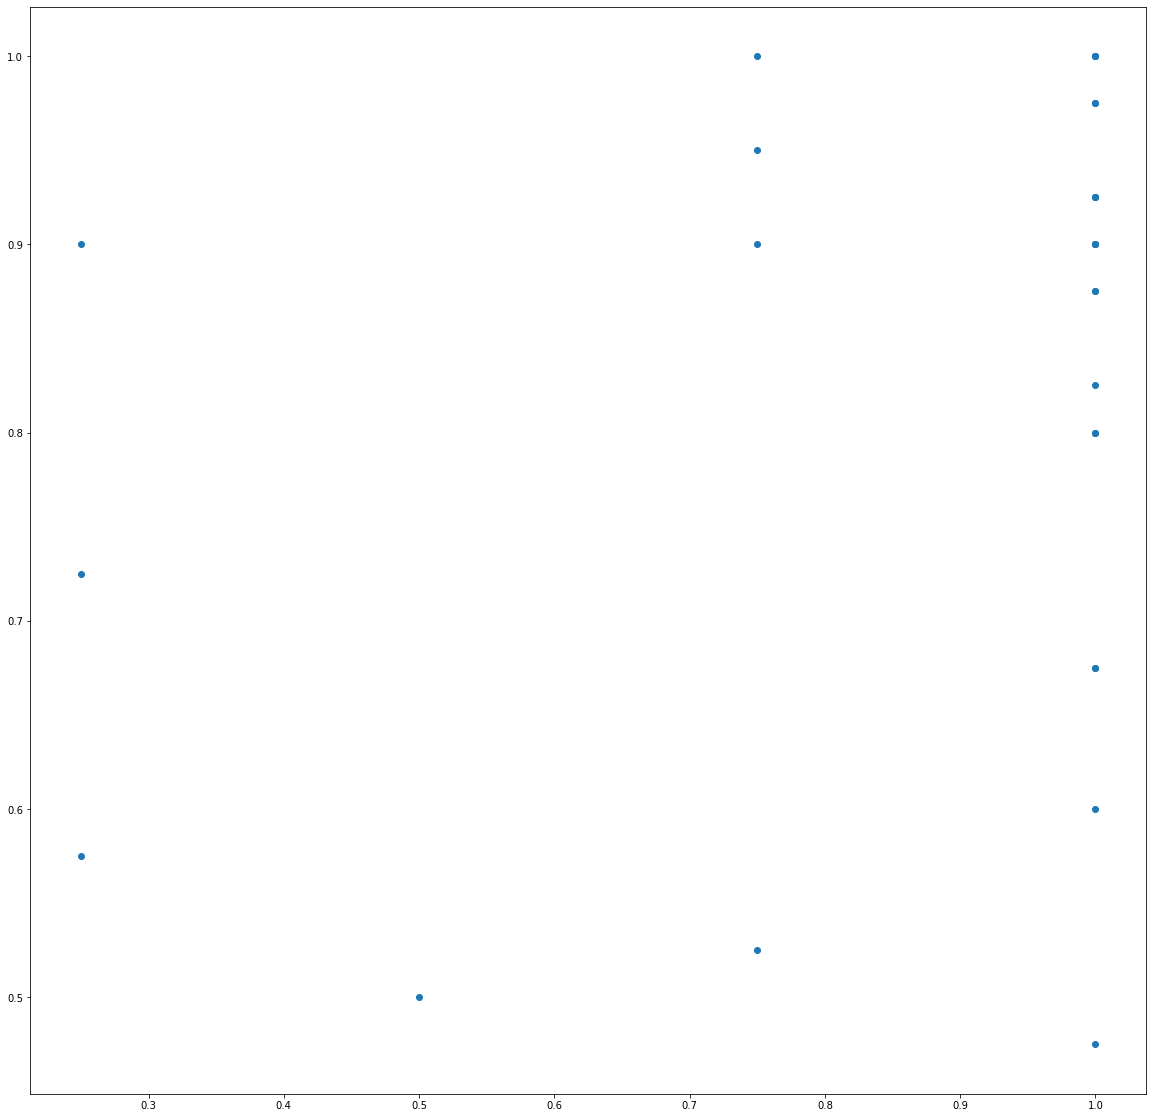

Fitting for 5-fold split 1
Running network...


c:\users\shank\appdata\local\programs\python\python37\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.35555555555555557


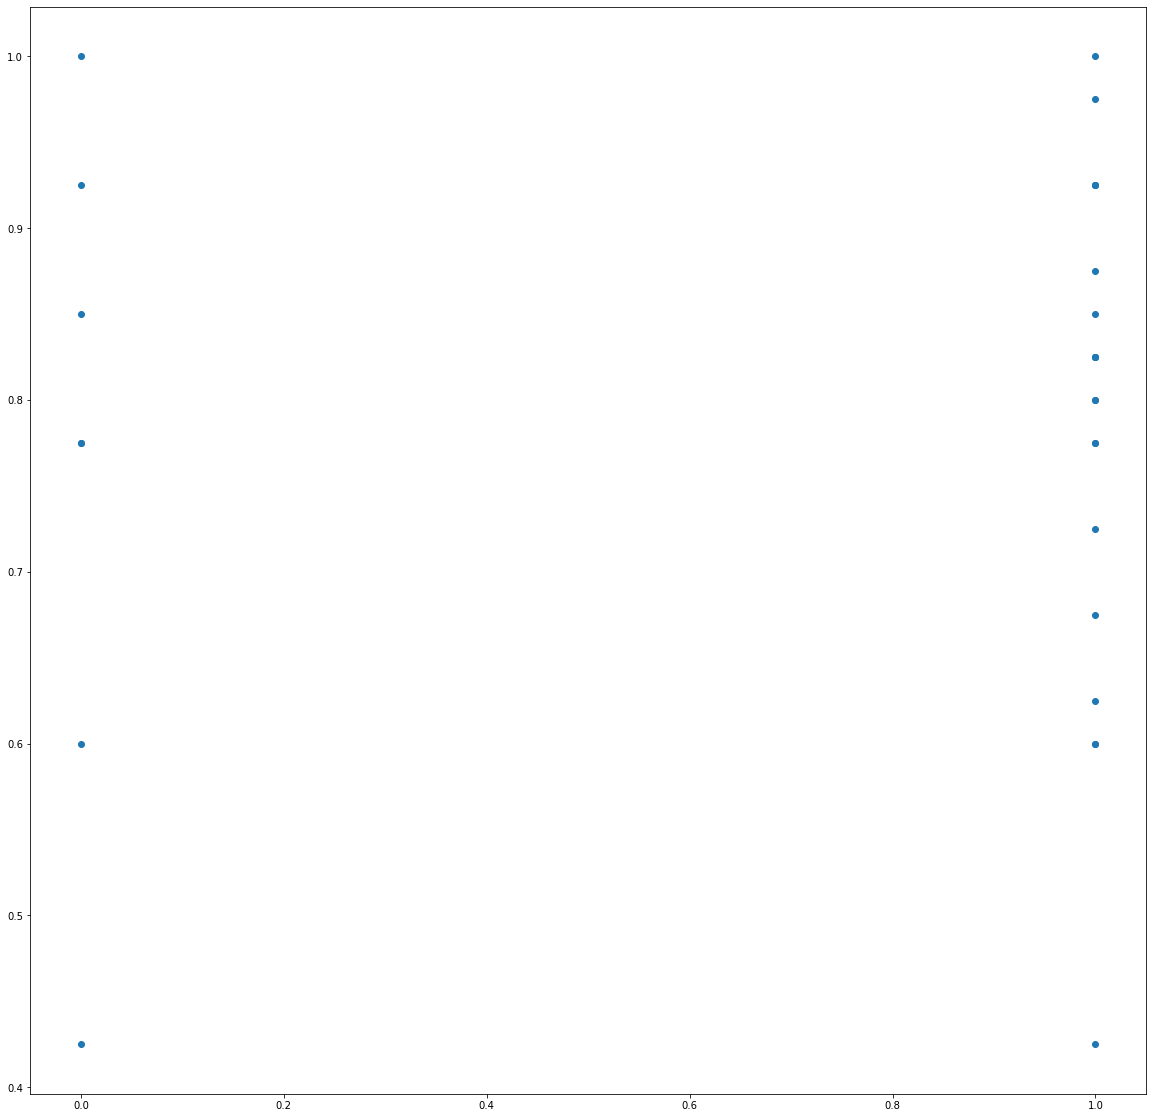

Fitting for 5-fold split 2
Running network...


c:\users\shank\appdata\local\programs\python\python37\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.17403846153846153


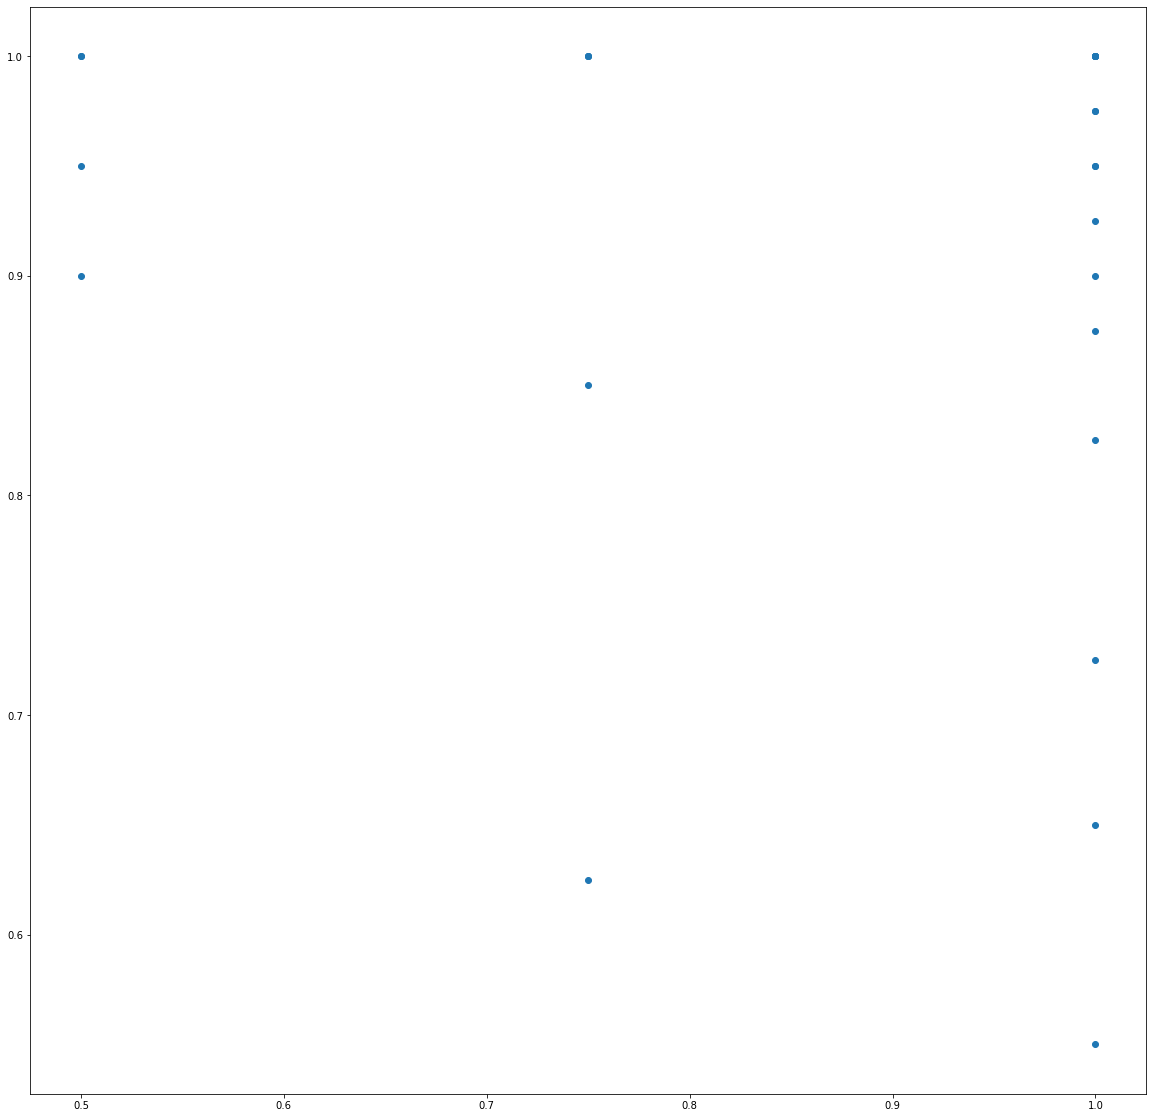

Fitting for 5-fold split 3
Running network...


c:\users\shank\appdata\local\programs\python\python37\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.21250000000000002


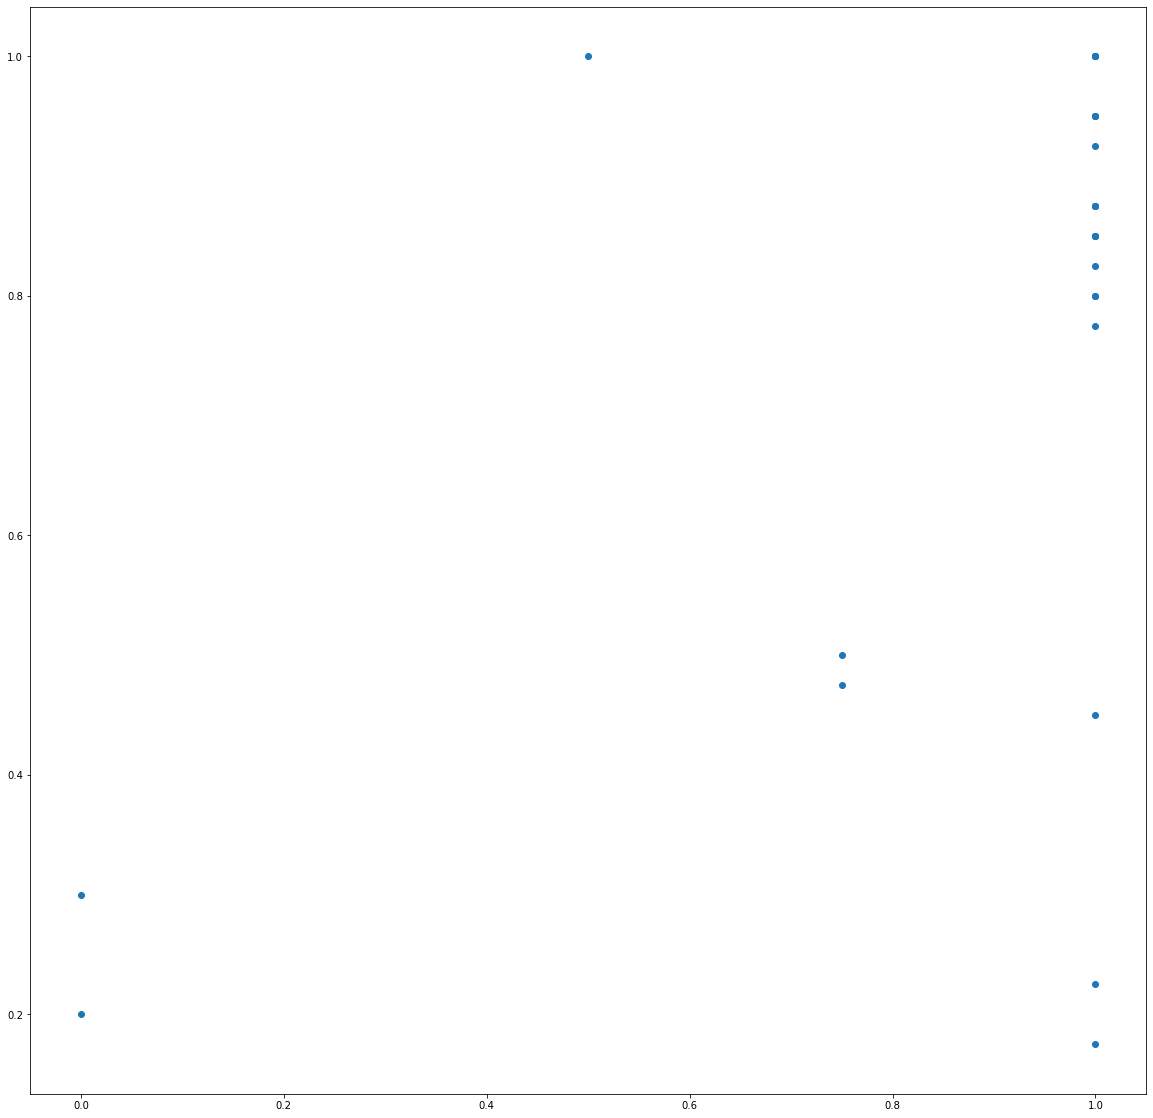

Fitting for 5-fold split 4
Running network...


c:\users\shank\appdata\local\programs\python\python37\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.228125


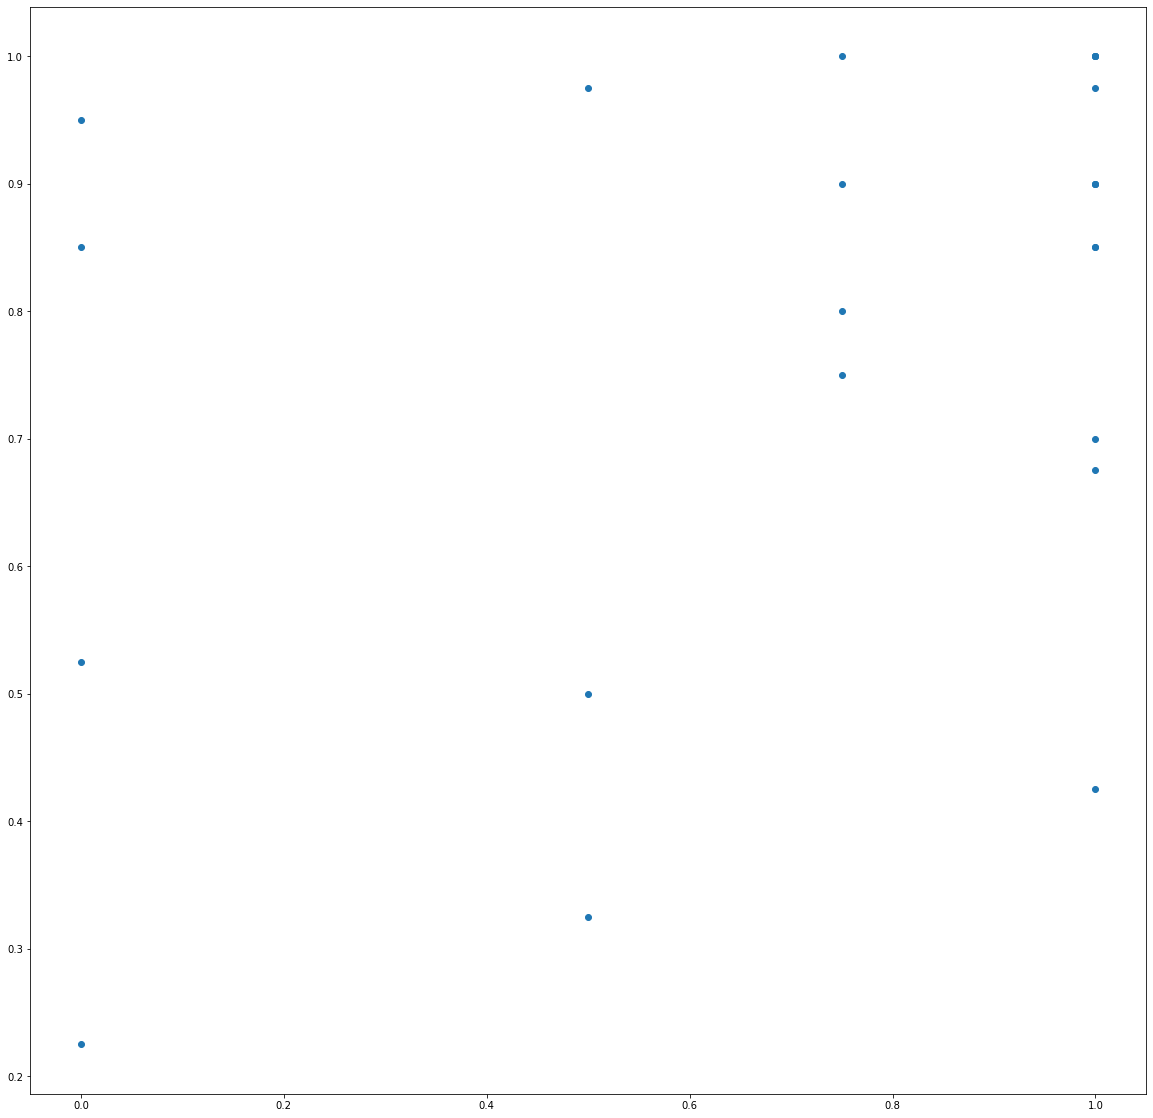

In [16]:
for i_split, (train_scores, test_scores) in enumerate(cross_val):
    print(f'Fitting for 5-fold split {i_split}')
    train_generator = EngineeredFeaturesDataGenerator(train_scores, features_conf, videos_folder=SITTING_VIDEOS_DATA_FOLDER)
    test_generator = EngineeredFeaturesDataGenerator(test_scores, features_conf, videos_folder=SITTING_VIDEOS_DATA_FOLDER)
    run_network(train_generator, test_generator)